Loading a 2D equilibrium (J-TEXT)
=================================

In [1]:
import fusionsc as fsc
from fusionsc.devices import jtext
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

We use J-TEXT as an example for a 3D perturbation applied to a 2D equilibrium. We use an example equilibrium for the J-TEXT Tokamak (which is just the contents of an EFit geqdsk file). On top of that equilibrium, we apply a perturbation field generated by the island coils. The field will then be calculated as `field + coilCurrent * perturbation`.

In [2]:
efitExample = jtext.exampleGeqdsk()
field = fsc.magnetics.MagneticConfig.fromEFit(efitExample)
geometry = jtext.hfsLimiter() + jtext.target()

perturbation = jtext.islandCoils([1] * 6)

We pre-calculate the perturbation and the background field separately, so that field + current * perturbation can be efficiently computed.

In [3]:
grid = jtext.defaultGrid()
geoGrid = jtext.defaultGeometryGrid()

field = field.compute(grid)
perturbation = perturbation.compute(grid)

geometry = geometry.index(geoGrid)

Now we run Poincaré plots for a few different cases

  0%|          | 0/3 [00:00<?, ?it/s]

Perturbed field:
 sum:
  - computedField:
      grid:
        rMin: 0.69999999999999996
        rMax: 1.3999999999999999
        zMin: -0.34999999999999998
        zMax: 0.34999999999999998
        nSym: 1
        nR: 70
        nZ: 70
        nPhi: 128
  - scaleBy:
      field:
        computedField:
          grid:
            rMin: 0.69999999999999996
            rMax: 1.3999999999999999
            zMin: -0.34999999999999998
            zMax: 0.34999999999999998
            nSym: 1
            nR: 70
            nZ: 70
            nPhi: 128
      factor: 0


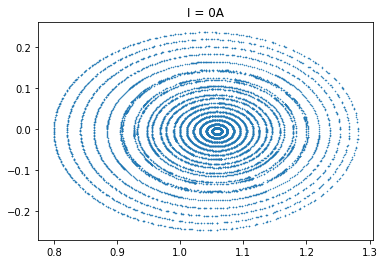

Perturbed field:
 sum:
  - computedField:
      grid:
        rMin: 0.69999999999999996
        rMax: 1.3999999999999999
        zMin: -0.34999999999999998
        zMax: 0.34999999999999998
        nSym: 1
        nR: 70
        nZ: 70
        nPhi: 128
  - scaleBy:
      field:
        computedField:
          grid:
            rMin: 0.69999999999999996
            rMax: 1.3999999999999999
            zMin: -0.34999999999999998
            zMax: 0.34999999999999998
            nSym: 1
            nR: 70
            nZ: 70
            nPhi: 128
      factor: 2000


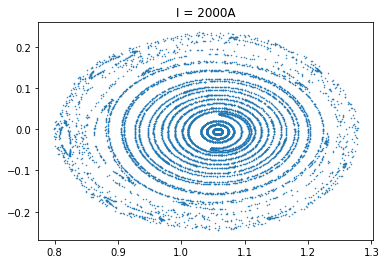

Perturbed field:
 sum:
  - computedField:
      grid:
        rMin: 0.69999999999999996
        rMax: 1.3999999999999999
        zMin: -0.34999999999999998
        zMax: 0.34999999999999998
        nSym: 1
        nR: 70
        nZ: 70
        nPhi: 128
  - scaleBy:
      field:
        computedField:
          grid:
            rMin: 0.69999999999999996
            rMax: 1.3999999999999999
            zMin: -0.34999999999999998
            zMax: 0.34999999999999998
            nSym: 1
            nR: 70
            nZ: 70
            nPhi: 128
      factor: 4000


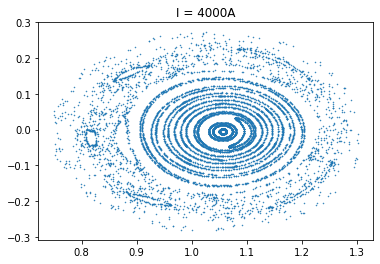

In [4]:
startPoints = np.linspace([0.8, 0, 0], [1.2, 0, 0], 20, axis = 1)

for current in tqdm([0, 2000, 4000]):
    perturbedField = field + current * perturbation
    print("Perturbed field:\n", perturbedField.toYaml())
    
    x, y, z, lFwd, lBwd = fsc.flt.poincareInPhiPlanes(
        startPoints,
        perturbedField,
        [0],
        500,
        distanceLimit = 1e5,
        grid = grid # A "+" expression is not a computed field, so we need to specify a grid to evaluate on
    )
    
    plt.figure()
    plt.title("I = {}A".format(current))
    plt.scatter(x, z, marker = '.', s = 1)
    plt.show()

In [5]:
ax = fsc.flt.findAxis(field)

In [6]:
ax

(array([ 1.05811466,  0.        , -0.00539105]),
 array([[ 1.05811457e+00,  1.00632674e+00,  8.56032704e-01,
          6.21944160e-01,  3.26975395e-01,  9.41812322e-12,
         -3.26975401e-01, -6.21944227e-01, -8.56032740e-01,
         -1.00632686e+00, -1.05811469e+00, -1.00632682e+00,
         -8.56032801e-01, -6.21944159e-01, -3.26975404e-01,
         -1.39974813e-11,  3.26975383e-01,  6.21944173e-01,
          8.56032646e-01,  1.00632681e+00],
        [-1.11451495e-11,  3.26975379e-01,  6.21944165e-01,
          8.56032698e-01,  1.00632679e+00,  1.05811469e+00,
          1.00632681e+00,  8.56032790e-01,  6.21944191e-01,
          3.26975417e-01,  1.37558776e-11, -3.26975404e-01,
         -6.21944236e-01, -8.56032695e-01, -1.00632682e+00,
         -1.05811460e+00, -1.00632675e+00, -8.56032715e-01,
         -6.21944123e-01, -3.26975401e-01],
        [-5.39102963e-03, -5.39103633e-03, -5.39102286e-03,
         -5.39101403e-03, -5.39101083e-03, -5.39101363e-03,
         -5.39102211e-0